In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


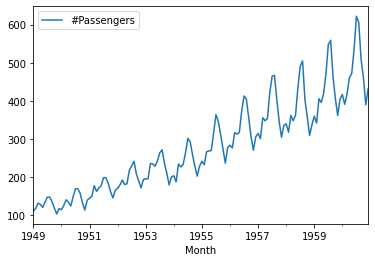

In [136]:
data = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')
data.plot()
data

In [137]:
data2 = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'], index_col = 'Month')
train_data = data2.iloc[:-30]
test_data = data2.iloc[-30:]
print(train_data.shape), print(test_data.shape)

(114, 1)
(30, 1)


(None, None)

In [138]:
#lets do adfuller test
result = adfuller(data)
print("The value of P: ", result[1])
if result[1]>0.05:
    print("Unstationary")
    
else:
    print("Stationary")

The value of P:  0.9918802434376409
Unstationary


In [139]:
#converting it into stationary
data['#Passengers'] = data['#Passengers'].diff()[1:]
data.dropna(inplace = True)
data

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [140]:
#checking adfuller again
result = adfuller(data)
print("The value of P: ", result[1])
if result[1]>0.05:
    print("Unstationary")
    
else:
    print("Stationary")

The value of P:  0.05421329028382609
Unstationary


In [141]:
#converting it into stationary
data['#Passengers'] = data['#Passengers'].diff()[1:]
data.dropna(inplace = True)
data

,#Passengers
Month,
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
1949-07-01,-1.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [142]:
data['#Passengers'] = data['#Passengers'].diff()[1:]
data.dropna(inplace = True)
data

,#Passengers
Month,
1949-04-01,-25.0
1949-05-01,12.0
1949-06-01,27.0
1949-07-01,-23.0
1949-08-01,-12.0
...,...
1960-08-01,-127.0
1960-09-01,21.0
1960-10-01,133.0


In [143]:
#checking adfuller again
result = adfuller(data)
print("The value of P: ", result[1])
if result[1]>0.05:
    print("Unstationary")
    
else:
    print("Stationary")

The value of P:  5.079966883921446e-16
Stationary


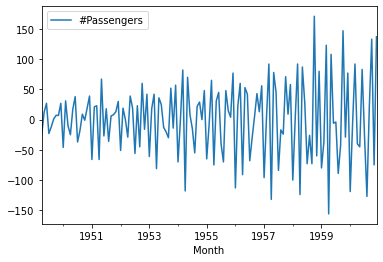

In [144]:
data.plot()

In [145]:
best_model = auto_arima(data, trace = True, supress_warnings = True)
best_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1562.328, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1526.022, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1560.349, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1501.438, Time=0.05 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1498.766, Time=0.06 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1475.845, Time=0.10 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1468.036, Time=0.12 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1466.037, Time=0.07 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=1473.853, Time=0.05 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=0.10 s

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  141
Model:               SARIMAX(5, 0, 0)   Log Likelihood                -727.018
Date:                Tue, 21 Dec 2021   AIC                           1466.037
Time:                        10:56:07   BIC                           1483.729
Sample:                             0   HQIC                          1473.226
                                - 141                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9873      0.090    -10.931      0.000      -1.164      -0.810
ar.L2         -0.9524      0.155     -6.126      0.000      -1.257      -0.648
ar.L3         -0.7584      0.194     -3.916      0.000      -1.138      -0.379
ar.L4         -0.6679      0.172     -3.893      0.000      -1.004      -0.332
ar.L5         -0.2733      0.077     -3.568      0.000      -0.423      -0.123
sigma2      1737.5978    195.340      8.895      0.000    1354.739    2120.456
===================================================================================
Ljung-Box (Q):                      286.81   Jarque-Bera (JB):                 6.04
Prob(Q):                              0.00   Prob(JB):                         0.05
Heteroskedasticity (H):               8.56   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [146]:
model = ARIMA(train_data, order=(5,0,0))
import warnings
warnings.filterwarnings("ignore")

In [147]:
model = model.fit()

In [148]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  114
Model:                     ARMA(5, 0)   Log Likelihood                -524.187
Method:                       css-mle   S.D. of innovations             23.636
Date:                Tue, 21 Dec 2021   AIC                           1062.373
Time:                        10:56:07   BIC                           1081.527
Sample:                    01-01-1949   HQIC                          1070.147
                         - 06-01-1958                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               250.2137     81.584      3.067      0.002      90.313     410.115
ar.L1.#Passengers     1.2719      0.091     13.960      0.000       1.093       1.450
ar.L2.#Passengers    -0.5500      0.148     -3.713      0.000      -0.840      -0.260
ar.L3.#Passengers     0.3480      0.154      2.256      0.024       0.046       0.650
ar.L4.#Passengers    -0.4181      0.149     -2.800      0.005      -0.711      -0.125
ar.L5.#Passengers     0.3295      0.092      3.566      0.000       0.148       0.511
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0154           -0.0000j            1.0154           -0.0000
AR.2            0.8826           -0.9093j            1.2672           -0.1274
AR.3            0.8826           +0.9093j            1.2672            0.1274
AR.4           -0.7558           -1.1358j            1.3643           -0.3434
AR.5           -0.7558           +1.1358j            1.3643            0.3434
-----------------------------------------------------------------------------
"""

In [149]:
predictions = model.predict(start= len(train_data), end = len(train_data)+len(test_data), dynamic = True)
predictions

1958-07-01    432.838698
1958-08-01    416.061900
1958-09-01    410.085644
1958-10-01    385.796574
1958-11-01    376.977676
1958-12-01    383.342385
1959-01-01    384.805838
1959-02-01    388.284236
1959-03-01    389.803237
1959-04-01    384.764601
1959-05-01    380.216251
1959-06-01    376.758825
1959-07-01    373.620206
1959-08-01    372.554037
1959-09-01    371.962535
1959-10-01    370.651289
1959-11-01    369.110952
1959-12-01    367.078779
1960-01-01    364.780912
1960-02-01    362.793215
1960-03-01    361.033628
1960-04-01    359.431282
1960-05-01    357.960463
1960-06-01    356.432611
1960-07-01    354.821421
1960-08-01    353.190790
1960-09-01    351.558228
1960-10-01    349.972084
1960-11-01    348.455326
1960-12-01    346.981292
1961-01-01    345.533993
Freq: MS, dtype: float64

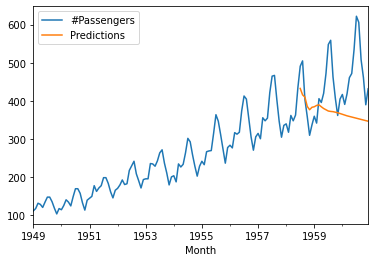

In [150]:
data2['Predictions'] = predictions
data2.plot()